
### GitHub: https://github.com/VaishnaviMuley19
### LinkedIn: https://www.linkedin.com/in/vaishnavi-muley/

-------------------------------------------------------------------------------------------------------------------------------

# The Sparks Foundation : 

## Data Science and Business Analytics Internship's Task 2


.............................................................................................................................................................................................................................................................

## Prediction using Unsupervised ML


### Step 1: Understand the Problem.

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.



- Let us understand what is clustering first:
So, basically clustering is the process of dividing the dataset into groups, consisting of similar data points.



- Applications of clustering:
Recomendation systems, search engines, etc.



- Types of clustering:
1. Exclusive clustering: Here the data points belongs exclusively to one cluster i.e., they are not at all related to each other. Thus, it is also called as Hard clustering. For example: K-means clustering.


2. Overlapping clustering: Here the data points can belong to multiple clusters. For example: C-means clustering.


3. Hierarchical clustering



### Step 2: Find the source of data and load it.

Dataset is available at: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [1]:
# Loading the dataset

import pandas as pd

df = pd.read_csv('Iris.csv')

In [2]:
# Printing the first 5 rows of the dataset

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Printing the last 5 rows of the dataset

df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Step 3: Explore the data.

In [4]:
# Getting to know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Getting to know unique species

df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Note:

Here for solving this problem we will be using exclusive clustering as the data point will be either of 'Iris-setosa' species or 'Iris-versicolor' or 'Iris-virginica' and tehy won't be related to each other in any possible way. 

That is here I need to use K-means clustering.


    - What is K-means clustering?
    K-means is a clustering algorithm whose main goal is to group similar data points into a cluster and the 'K' in 'K-means' represents the number of clusters. 
    
Here, k = 3.

### Step 4: Finding the optimum number of clusters for k-means classification.

In [7]:
from sklearn.cluster import KMeans

x = df.iloc[:, 1:5].values


wcss = []                                   # within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


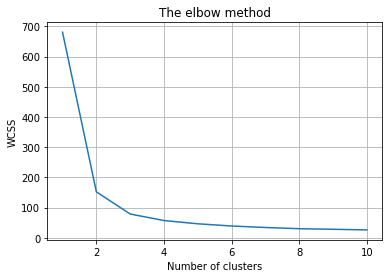

In [8]:
import matplotlib.pyplot as plt

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

### Step 5: Model Building.

In [9]:
model = KMeans(n_clusters = 3, max_iter = 300)
model.fit(x)

KMeans(n_clusters=3)

In [10]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Step 6: Visualizing the results.

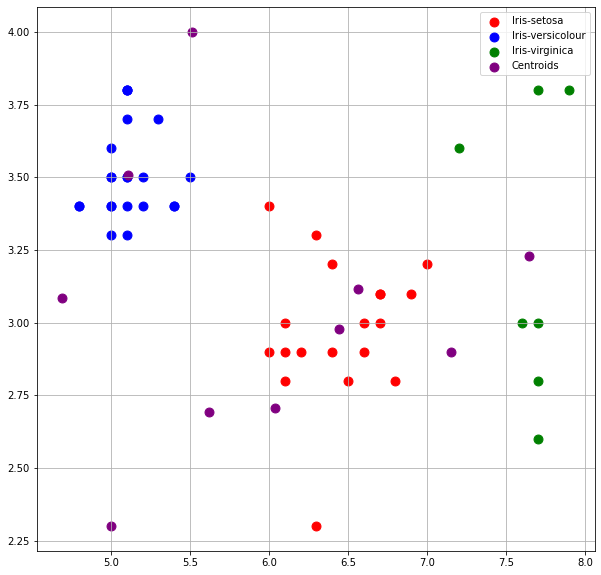

In [11]:
# Plotting the results

y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns

plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 80, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 80, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 80, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 80, c = 'purple', label = 'Centroids')


plt.legend()
plt.grid()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

# End of Task 2


## Task by: Vaishnavi Nilkanth Muley